<a href="https://colab.research.google.com/github/CobaMasa/PythonMachineLearningProgramming/blob/master/chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load data
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
print('shape: ', df_wine.shape)
df_wine.head()

shape:  (178, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(df_wine.iloc[:, 1:]), df_wine.iloc[:, 0], test_size=0.2, stratify=df_wine.iloc[:, 0])
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.828391,-1.109824,-0.316249,-1.049479,0.088358,-0.392751,-0.942995,2.160669,-2.069034,-0.773474,1.283518,-1.330077,-0.213021
1,0.616869,-0.472483,0.890014,0.151661,-0.262708,0.376368,0.583034,-0.659563,0.121071,-0.665332,0.713164,1.706675,0.312420
2,-0.494869,0.110998,-0.608676,-0.298767,-0.403135,-1.081754,-1.374701,2.160669,-1.140430,0.883269,-0.997898,-1.457197,-0.165254
3,-0.445459,-0.876432,-1.266637,-0.809251,0.018145,-0.440821,-0.621726,1.354888,-1.701097,0.299300,0.098937,-1.443072,-0.945455
4,-1.137207,-0.454530,-0.170035,-0.298767,-1.315908,-1.113800,-0.531369,1.274310,0.086029,-1.149810,0.537671,-0.482611,-0.849920


## Variance-Covariance matrix
If the explanatory variables are d-dimentions...

\begin{bmatrix}
    \sigma_{1}^2&\sigma_{12}&...&\sigma_{1n}\\
    \sigma_{21}&\sigma_{2}^2&...&\sigma_{2n}\\
    \vdots&\vdots&\vdots&\vdots\\
    \sigma_{n1}&\sigma_{n2}&...&\sigma_{n}^2
\end{bmatrix}

ex.)i=2, j=3
$$
    \sigma_{23}=\frac{1}{n}\sum_{k=1}^n(x_{2}^{(k)}-\mu_2)(x_3^{(k)}-\mu_3)
$$

and we wanna get eigen vectors & values from the matrix above.

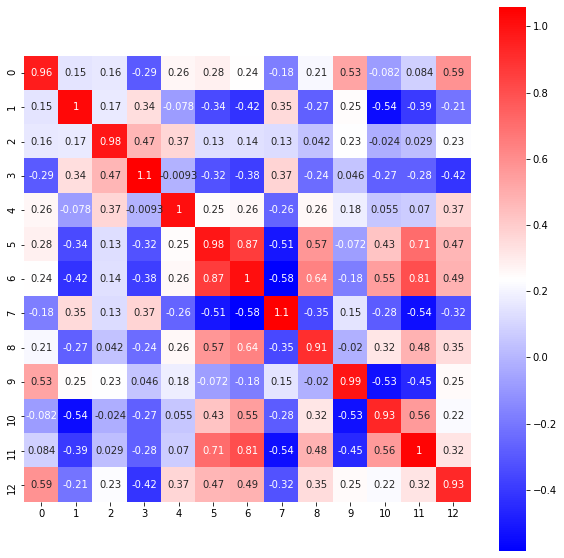

In [4]:
cov_mat = np.cov(X_train.T)
fig = plt.figure(figsize=(10, 10))
sns.heatmap(cov_mat, square=True, annot=True, cmap='bwr')
plt.show();

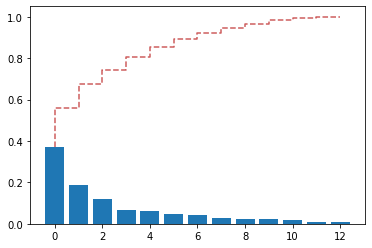

In [5]:
np.set_printoptions(precision=3, suppress=True)
# get eigen vec & val pairs
from scipy.linalg import eig
eig_vals, eig_vecs = eig(cov_mat)
# just use real part
eig_vals = eig_vals.real

# eig_vals percentages
lamsum = eig_vals.sum()
pcts = [lam/lamsum for lam in np.sort(eig_vals)[::-1]]
cum_var = np.cumsum(pcts)
plt.bar(range(eig_vals.shape[0]), pcts)
plt.step(range(eig_vals.shape[0]), cum_var, c='indianred', ls='--')

In [6]:
## check a specification of scipy.linalg.eig()

A = np.array([[4, -2], [1, 1]])
vals, vecs = eig(A)
# Ax = λx
lam = vals[0]
print('lambda: ', lam)

print('lam*x:', lam*vecs[0])
print(A.dot(vecs[0]))

print('\nlam*x: ', lam*vecs[:, 0])
print(A.dot(vecs[:, 0])) # This one is correct

#eigen vecs got through scipy.linalg.eig() are set of VERTICAL VECTORS relating with eigen values.
# vecs 
pd.DataFrame(vecs)

lambda:  (3+0j)
lam*x: [2.683+0.j 2.121+0.j]
[2.163 1.602]

lam*x:  [2.683+0.j 1.342+0.j]
[2.683 1.342]


,0,1
0,0.894427,0.707107
1,0.447214,0.707107


In [0]:
eigen_paris = [(eig_vals[i], eig_vecs[:, i]) for i in range(len(eig_vals))]
eigen_pairs = sorted(eigen_paris, reverse=True)

In [8]:
# use 3 biggest eign vecs
W = np.hstack([eigen_pairs[0][1].reshape(-1, 1), eigen_pairs[1][1].reshape(-1, 1), eigen_pairs[2][1].reshape(-1, 1)])
W

array([[-0.136, -0.475,  0.257],
       [ 0.257, -0.242, -0.063],
       [-0.011, -0.334, -0.591],
       [ 0.242, -0.041, -0.619],
       [-0.146, -0.329, -0.231],
       [-0.387, -0.077, -0.102],
       [-0.425, -0.019, -0.116],
       [ 0.317, -0.019, -0.115],
       [-0.303, -0.08 , -0.066],
       [ 0.103, -0.522,  0.197],
       [-0.29 ,  0.27 , -0.139],
       [-0.38 ,  0.157, -0.164],
       [-0.271, -0.334,  0.13 ]])

shape:  (142, 13) to:  (142, 3)


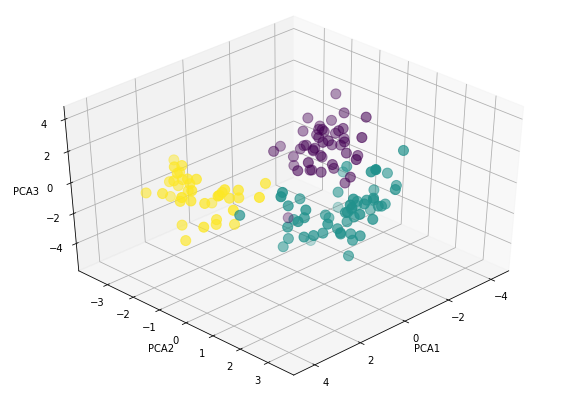

In [9]:
# calcurate x_new = xW
X_new = X_train.dot(W)
print('shape: ', X_train.shape, 'to: ', X_new.shape)

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter3D(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=y_train, s=100)
ax.view_init(40, 45)
ax.set(xlabel='PCA1', ylabel='PCA2', zlabel='PCA3')
plt.show();

In [10]:
# use library
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_train)
print(pca.explained_variance_)
print(np.sort(eig_vals)[::-1])

[4.783 2.41  1.521 0.876 0.769 0.624 0.55  0.353 0.287 0.27  0.213 0.143
 0.092]
[4.783 2.41  1.521 0.876 0.769 0.624 0.55  0.353 0.287 0.27  0.213 0.143
 0.092]


## Linear Discriminant Analysis